In [2]:
import pytesseract
from PIL import Image
from skimage.io import imread
import matplotlib.pyplot as plt
# sample 1: classify different type of pan cards

image = imread('resources/dummy_pans/pan_old/oAbbot_Mcintyre.jpg')
plt.imshow(image)

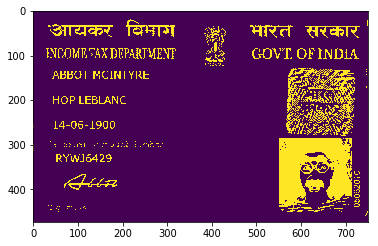

In [9]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_otsu 
from skimage.morphology import binary_dilation, binary_closing, square

img = rgb2gray(image)
#binarize the image
for_edge_detection_img = np.ones(img.shape)
r,c = img.shape
divider = 2
for ri in range(divider):
    for ci in range(divider):
        region = img[int((ri/divider)*r):int((ri/divider+1/divider)*r), int((ci/divider)*c):int((ci/divider+1/divider)*c)]
        thresh = threshold_otsu(region)
        for_edge_detection_img[int((ri/divider)*r):int((ri/divider+1/divider)*r), int((ci/divider)*c):int((ci/divider+1/divider)*c)] = region < thresh

plt.imshow(for_edge_detection_img)
plt.show()

In [11]:
from skimage import img_as_float 
import math 

binary_closed = binary_closing(for_edge_detection_img, square(math.floor(math.sqrt(np.median(al_areas)))))
# label image regions
label_image = label(binary_closed)
fig, ax = plt.subplots(figsize=(10, 6))

image_black = img_as_float(np.ones(img.shape))

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    if region.bbox_area < 0.1 * img.shape[0]*img.shape[1]:
        image_black[minr:maxr, minc:maxc] = 0

ax.imshow(image_black, cmap="gray")
ax.set_axis_off()
plt.tight_layout()
plt.show()

NameError: name 'al_areas' is not defined